<a href="https://colab.research.google.com/github/MoHi173/lab1/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4664 - loss: 0.7307 - val_accuracy: 0.4400 - val_loss: 0.7280
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4606 - loss: 0.7187 - val_accuracy: 0.3800 - val_loss: 0.7138
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4299 - loss: 0.7039 - val_accuracy: 0.4100 - val_loss: 0.6980
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5048 - loss: 0.6903 - val_accuracy: 0.6300 - val_loss: 0.6844
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6361 - loss: 0.6778 - val_accuracy: 0.6300 - val_loss: 0.6694
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7415 - loss: 0.6598 - val_accuracy: 0.6300 - val_loss: 0.6580
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7388 - loss: 0.6496 - val_accuracy: 0.6800 - val_loss: 0.6484
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7655 - loss: 0.6365 - val_accuracy: 0.

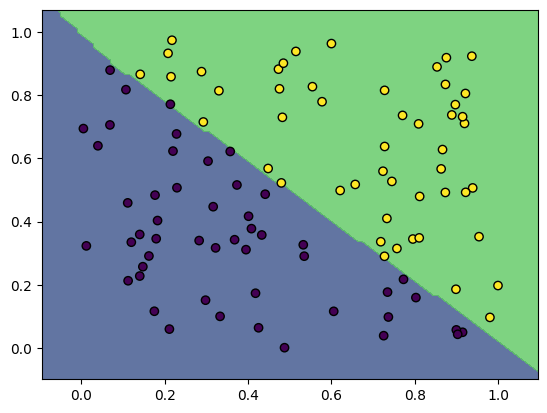

In [ ]:
# Importar las librerías necesarias
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
# Generar datos sintéticos
np.random.seed(0)
X = np.random.rand(500, 2) # 500 puntos con 2 características
y = np.where(X[:, 0] + X[:, 1] > 1, 1, 0) # Clasificación basada en una frontera no lineal
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test = X[:400], X[400:]
y_train, y_test = y[:400], y[400:]
# Definir el modelo MLP en TensorFlow
model = models.Sequential([
layers.Dense(10, activation='relu', input_shape=(2,)), # Capa oculta de 10 neuronas
layers.Dense(5, activation='relu'), # Segunda capa oculta con 5 neuronas
layers.Dense(1, activation='sigmoid') # Capa de salida con función sigmoide
])
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
validation_data=(X_test, y_test))
# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc:.2f}")
# Visualizar la frontera de decisión
def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
  np.arange(y_min, y_max, 0.01))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = (Z > 0.5).reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
  plt.show()
plot_decision_boundary(model, X_test, y_test)